<a href="https://colab.research.google.com/github/pi-mishra/HEALTH-INSURANCE-CROSS-SELL-PREDICTION/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION_(piyush).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

# 1. Knowing the Data

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import math
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from datetime import datetime
import datetime as dt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/HEALTH INSURANCE CROSS SELL PREDICTION (piyush)/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")

In [4]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.shape

(381109, 12)

# 2. Understanding the variables

In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [12]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

for col in categorical_columns:
    print(f'Unique value for {col}-{df[col].unique()}')

Unique value for Gender-['Male' 'Female']
Unique value for Vehicle_Age-['> 2 Years' '1-2 Year' '< 1 Year']
Unique value for Vehicle_Damage-['Yes' 'No']


# 3. Data Wrangling

In [13]:
df.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [14]:
male_data = df[df['Gender'] == 'Male']
female_data = df[df['Gender'] == 'Female']

In [15]:
male_data.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0


In [16]:
female_data.head(2)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0


# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

In [17]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [18]:
features = [ 'Gender', 'Driving_License','Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage']

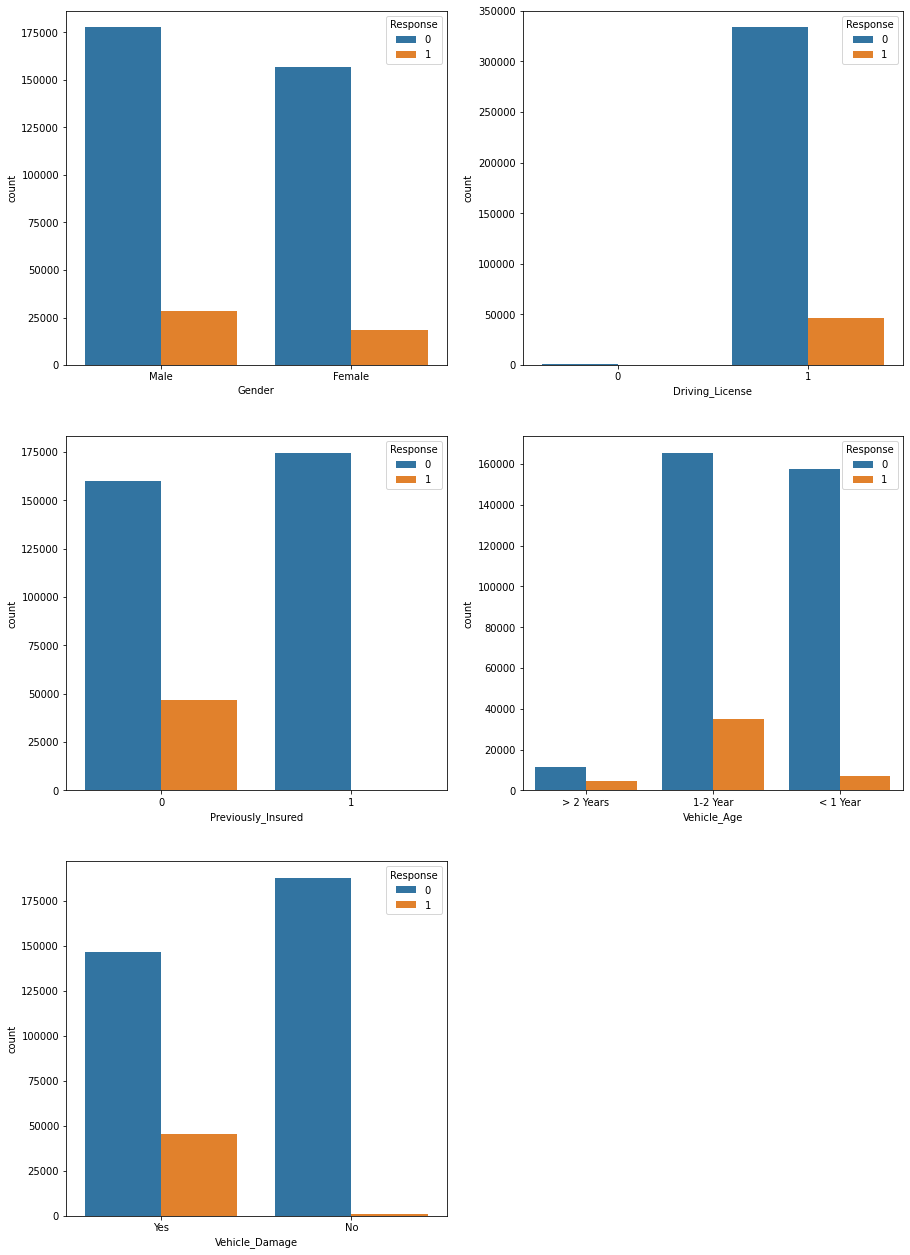

In [19]:
#fig 1. Finding the relation between catorical columns and dependent column
plt.figure(figsize = (15, 30))
a = 1
for i in features:
    plt.subplot(4, 2, a)
    sns.countplot(i, hue = 'Response', data = df) 
    a += 1


Text(0.5, 0, 'Policy Code')

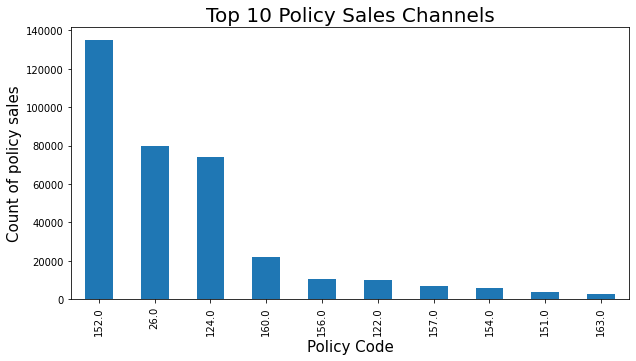

In [20]:
#fig2. getting the top 10 policy sales channels

count_of_top_policy_sales_channels=df['Policy_Sales_Channel'].value_counts()

count_of_top_policy_sales_channels.sort_index()
se=count_of_top_policy_sales_channels.head(10)

plt.subplots(figsize=(10,5))
se.plot.bar()

plt.title('Top 10 Policy Sales Channels', size=20)
plt.ylabel('Count of policy sales',size=15)
plt.xlabel('Policy Code',size=15)

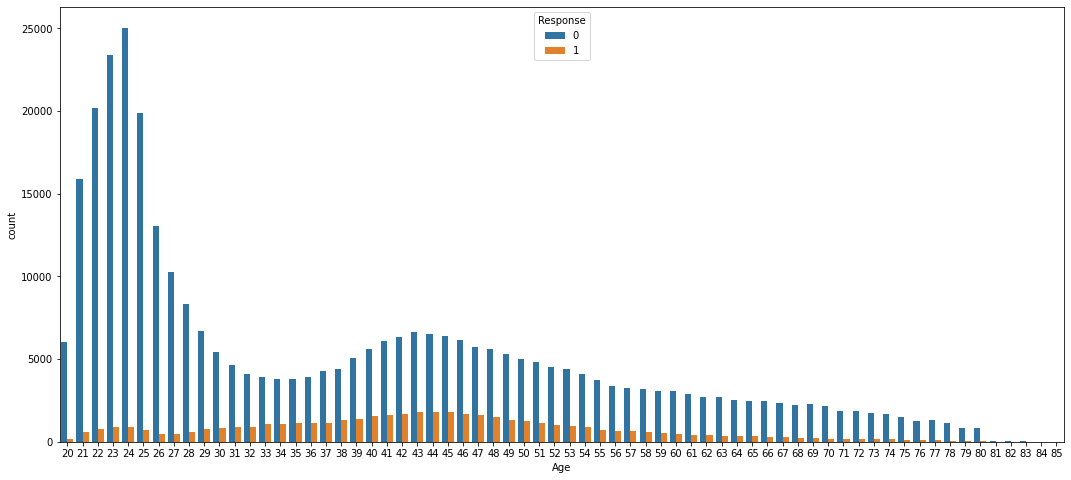

In [21]:
#fig3. getting the comparison between age and response column

plt.figure(figsize = (18, 8))
sns.countplot(df['Age'], hue = df['Response'])

## people ages between from 38 to 50 are more likely to respond
# while people ages between 20 to 30 are less likely to respond

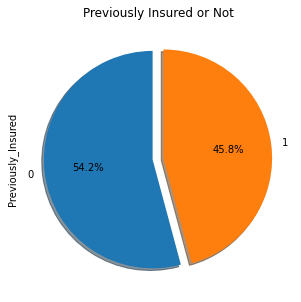

In [22]:
#fig4. previously insured or not

df ['Previously_Insured'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(5,5))
plt.title('Previously Insured or Not')
plt.show()

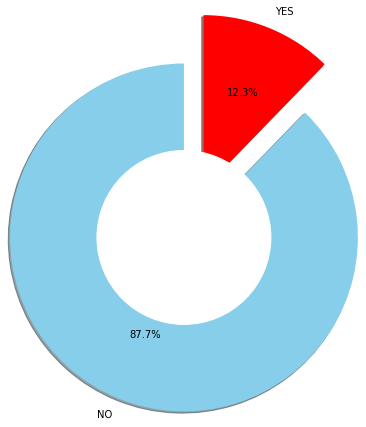

In [23]:
#fig.5 getting the response percentage

data = df['Response'].value_counts()
explode = (0, 0.6)
plt.pie(data, explode = explode,autopct='%1.1f%%',startangle=90,shadow=True,radius = 2.0, labels = ['NO','YES'],colors=['skyblue','red'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.show()

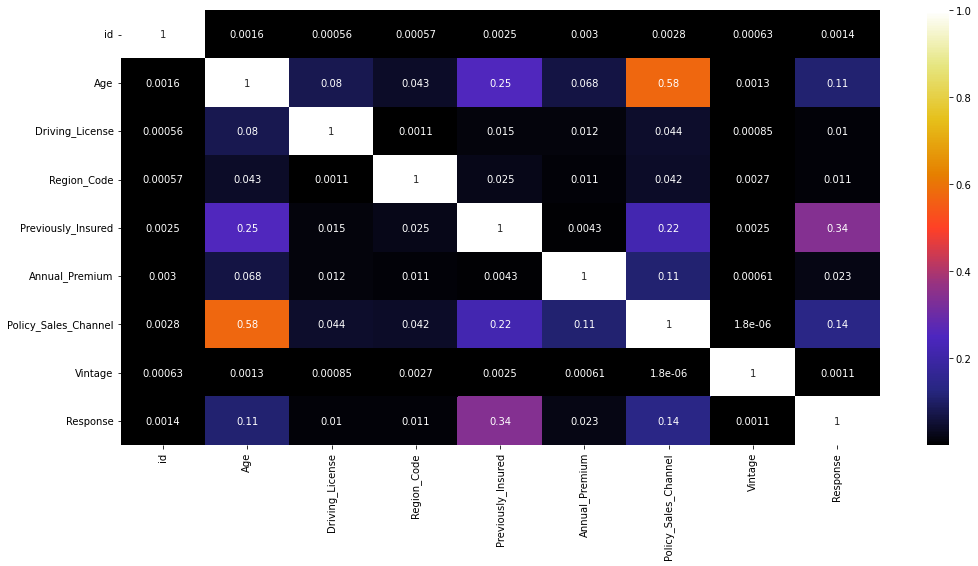

In [24]:
#fig6. Coorelation heatmap

plt.figure(figsize=(17,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap="CMRmap")

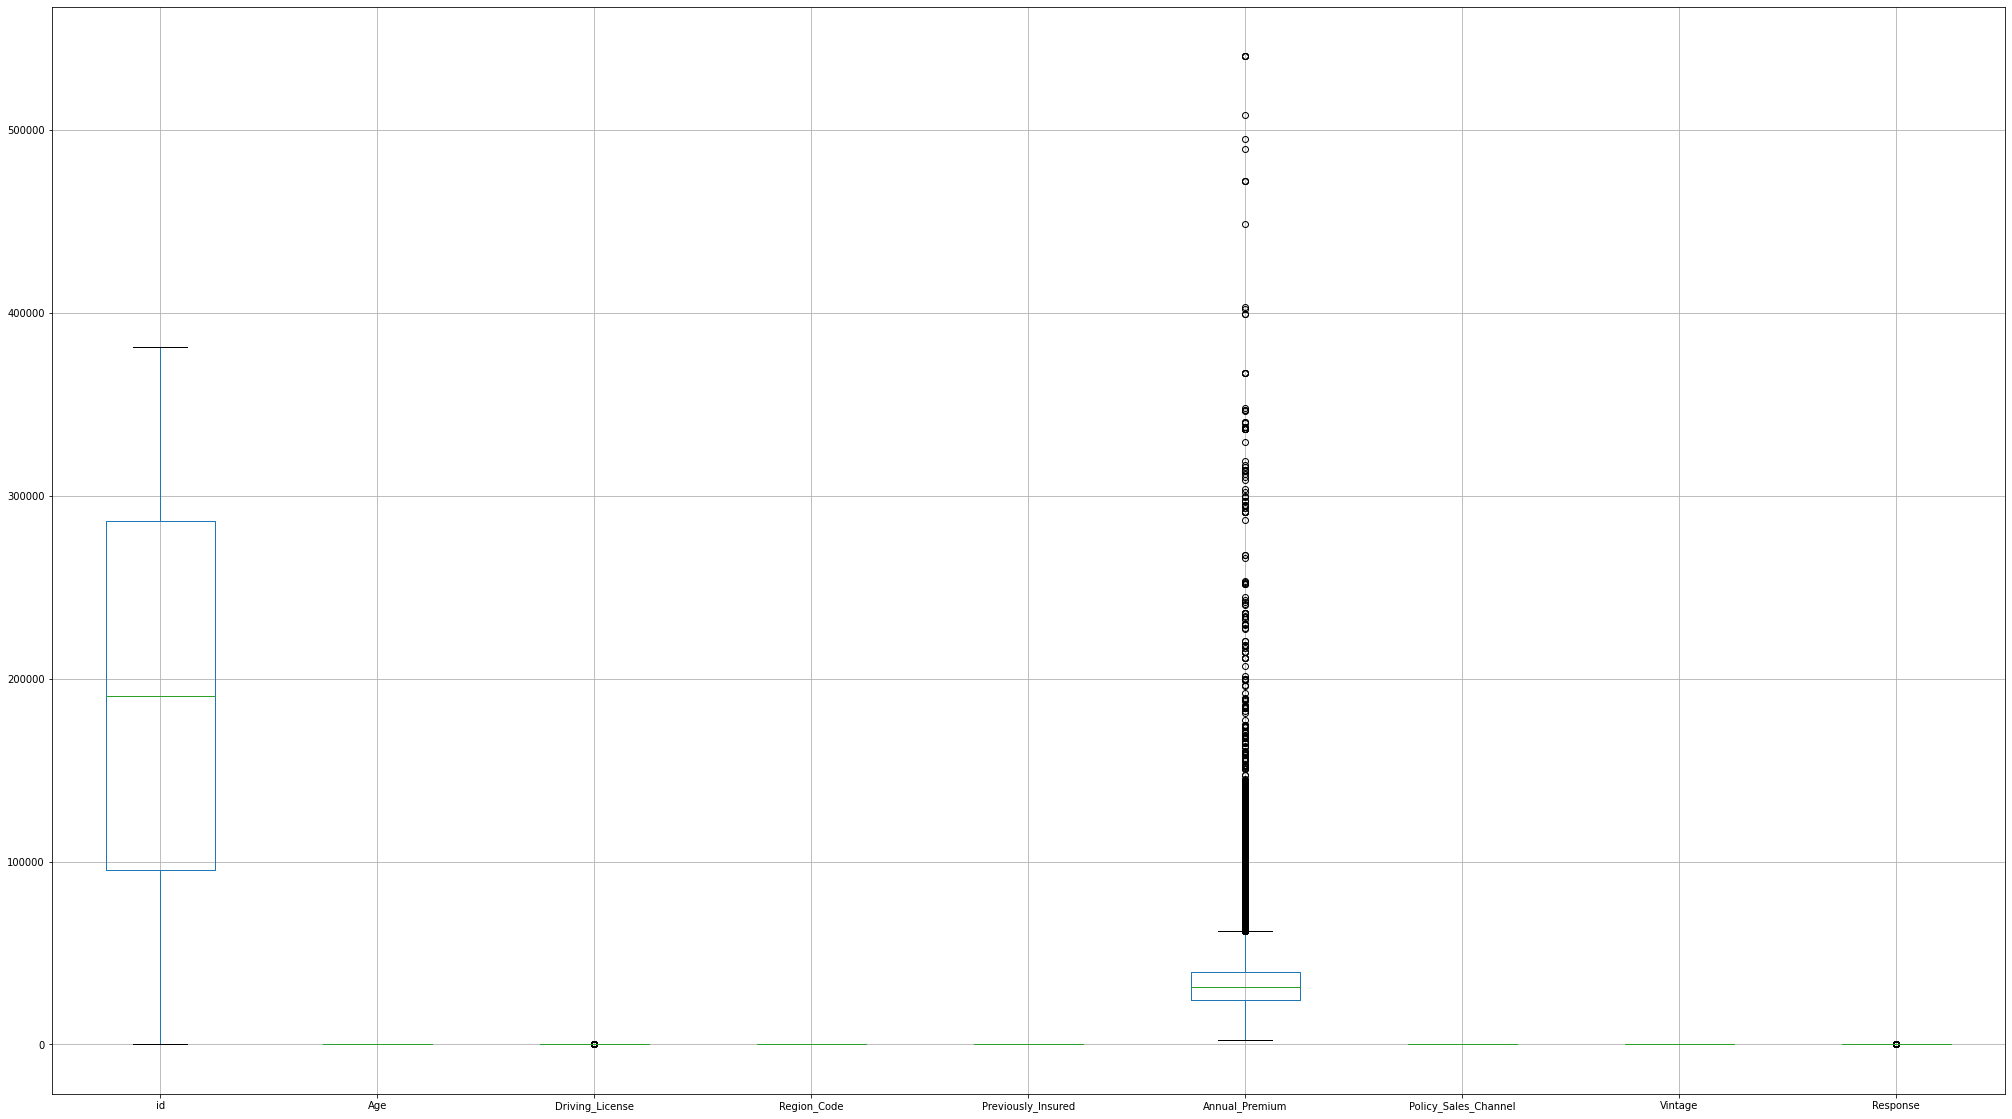

In [25]:
#boxplot for checking outliers

boxplot=df.boxplot(figsize=(35,20))

# 5. Feature Engineering & Data Pre-processing

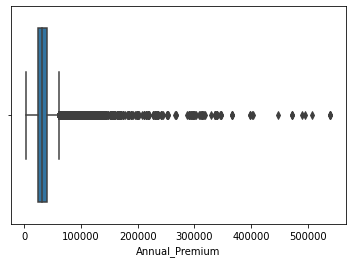

In [26]:
#removing the outliers

sns.boxplot(df['Annual_Premium'])

In [27]:
df['Annual_Premium'].skew()

#column is right skewed as it is positive

1.7660872148961309

In [28]:
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [29]:
# Finding the IQR
percentile25 = df['Annual_Premium'].quantile(0.25)
percentile75 = df['Annual_Premium'].quantile(0.75)

iqr = percentile75 - percentile25
print(iqr)

14995.0


In [30]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Upper Limit = ", upper_limit)
print("Lower Limit = ", lower_limit)

Upper Limit =  61892.5
Lower Limit =  1912.5


In [31]:
df[df['Annual_Premium']> upper_limit]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
25,26,Female,21,1,28.0,1,< 1 Year,No,61964.0,152.0,72,0
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0
139,140,Male,21,1,29.0,1,< 1 Year,No,62164.0,152.0,116,0
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0
...,...,...,...,...,...,...,...,...,...,...,...,...
380959,380960,Male,25,1,8.0,1,< 1 Year,No,61909.0,152.0,161,0
380998,380999,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0
381035,381036,Female,22,1,11.0,1,< 1 Year,No,62889.0,152.0,295,0
381047,381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0


In [32]:
df[df['Annual_Premium']<lower_limit]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


In [33]:
new_df = df[df['Annual_Premium']< upper_limit]

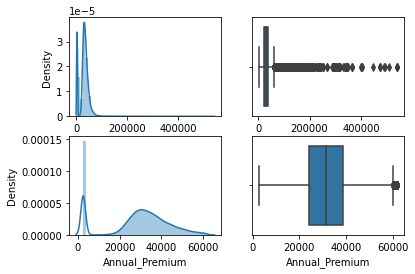

In [34]:
plt.subplot(2,2,1)
sns.distplot(df['Annual_Premium'])

plt.subplot(2,2,2)
sns.boxplot(df['Annual_Premium'])

plt.subplot(2,2,3)
sns.distplot(new_df['Annual_Premium'])

plt.subplot(2,2,4)
sns.boxplot(new_df['Annual_Premium'])

plt.show()

In [35]:
new_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [36]:
new_df= pd.get_dummies(new_df, columns= ['Gender','Vehicle_Age','Vehicle_Damage'],drop_first = True)

In [37]:
new_df.drop(['id'], axis=1, inplace = True)

In [38]:
new_df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
1,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
2,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
3,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
4,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


In [39]:
new_df.shape

(370789, 12)

In [40]:
new_df.dtypes

Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
Gender_Male                uint8
Vehicle_Age_< 1 Year       uint8
Vehicle_Age_> 2 Years      uint8
Vehicle_Damage_Yes         uint8
dtype: object

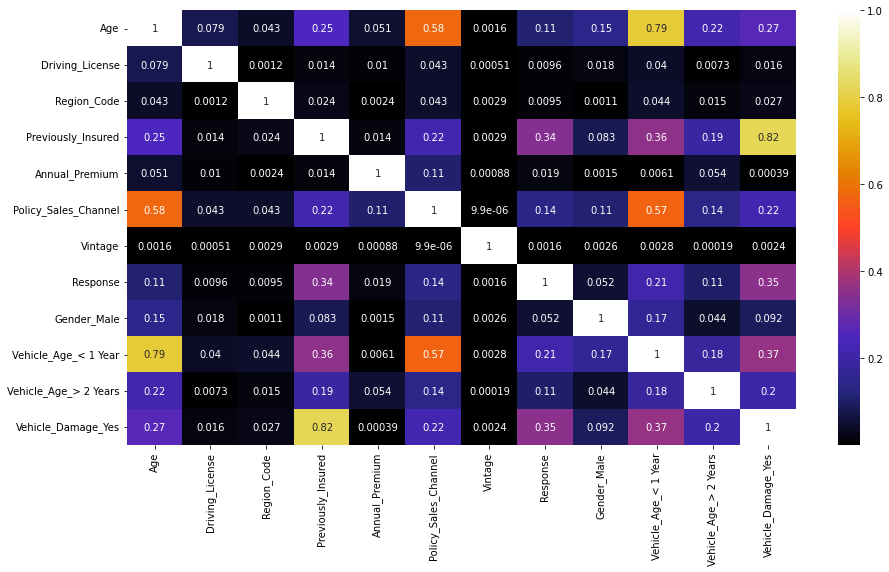

In [41]:
plt.figure(figsize=(15,8))
correlation = new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='CMRmap')

In [42]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [43]:
features = new_df.drop(['Response'],axis=1)
calc_vif(features)

,variables,VIF
0,Age,19.039604
1,Driving_License,54.669733
2,Region_Code,4.924115
3,Previously_Insured,5.745688
4,Annual_Premium,5.006453
5,Policy_Sales_Channel,8.376855
6,Vintage,4.376051
7,Gender_Male,2.235727
8,Vehicle_Age_< 1 Year,5.181757
9,Vehicle_Age_> 2 Years,1.124545


In [44]:
features2 = new_df.drop(['Response','Driving_License'],axis=1)
calc_vif(features2)

,variables,VIF
0,Age,9.999107
1,Region_Code,4.638757
2,Previously_Insured,5.146922
3,Annual_Premium,4.738776
4,Policy_Sales_Channel,6.816272
5,Vintage,4.164970
6,Gender_Male,2.197374
7,Vehicle_Age_< 1 Year,4.161774
8,Vehicle_Age_> 2 Years,1.120792
9,Vehicle_Damage_Yes,5.367545


In [45]:
features3 = new_df.drop(['Response','Age','Driving_License'],axis=1)
calc_vif(features3)

,variables,VIF
0,Region_Code,4.255316
1,Previously_Insured,4.226289
2,Annual_Premium,4.247838
3,Policy_Sales_Channel,6.695408
4,Vintage,3.903320
5,Gender_Male,2.125134
6,Vehicle_Age_< 1 Year,2.970038
7,Vehicle_Age_> 2 Years,1.106813
8,Vehicle_Damage_Yes,4.359574


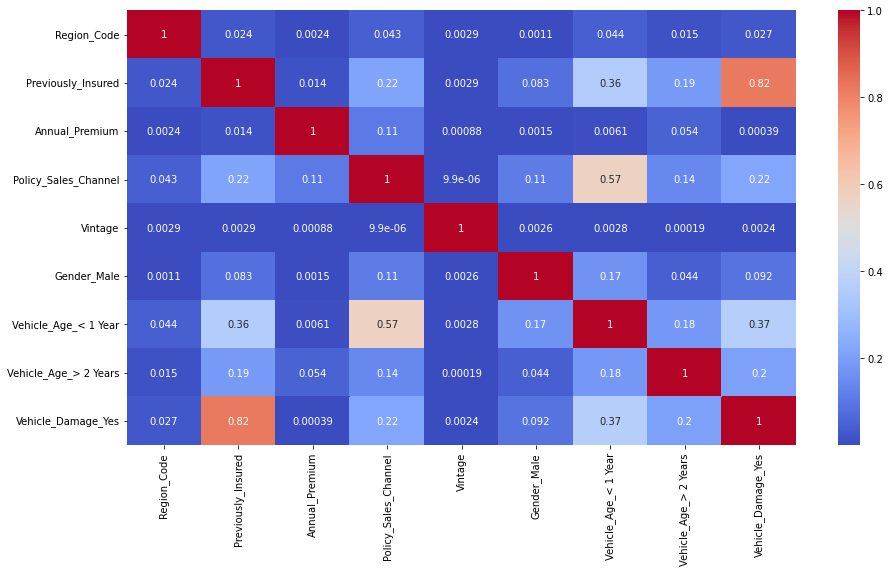

In [46]:
plt.figure(figsize=(15,8))
correlation = features3.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [47]:
features4 = new_df.drop(['Response','Age','Driving_License','Previously_Insured'],axis=1)
calc_vif(features4)

,variables,VIF
0,Region_Code,3.985597
1,Annual_Premium,3.861544
2,Policy_Sales_Channel,6.127068
3,Vintage,3.712095
4,Gender_Male,2.079059
5,Vehicle_Age_< 1 Year,2.951545
6,Vehicle_Age_> 2 Years,1.106720
7,Vehicle_Damage_Yes,2.184416


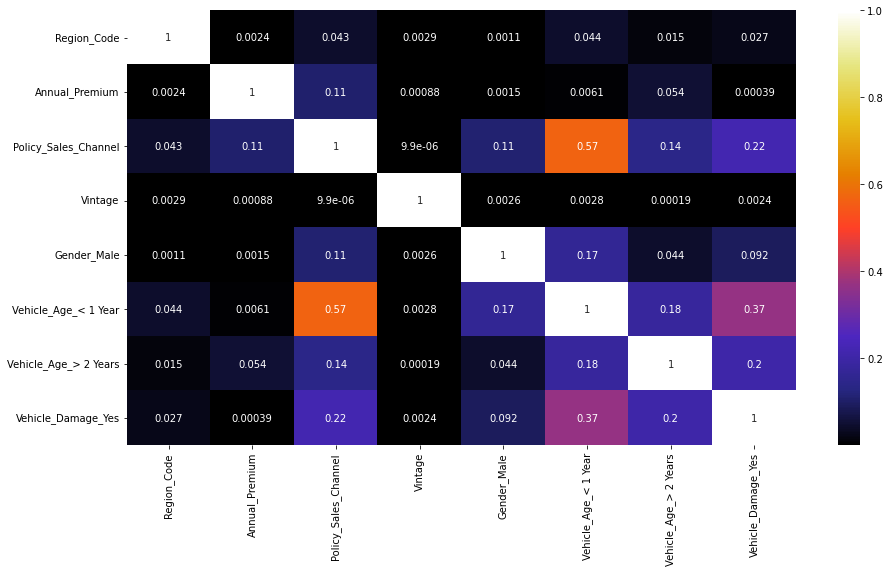

In [48]:
plt.figure(figsize=(15,8))
correlation = features4.corr()
sns.heatmap(abs(correlation), annot=True, cmap='CMRmap')

In [49]:
features5 = new_df.drop(['Response','Age','Driving_License','Previously_Insured','Policy_Sales_Channel'],axis=1)
calc_vif(features5)

,variables,VIF
0,Region_Code,3.740688
1,Annual_Premium,3.779070
2,Vintage,3.500315
3,Gender_Male,2.042401
4,Vehicle_Age_< 1 Year,1.809550
5,Vehicle_Age_> 2 Years,1.105510
6,Vehicle_Damage_Yes,2.127011


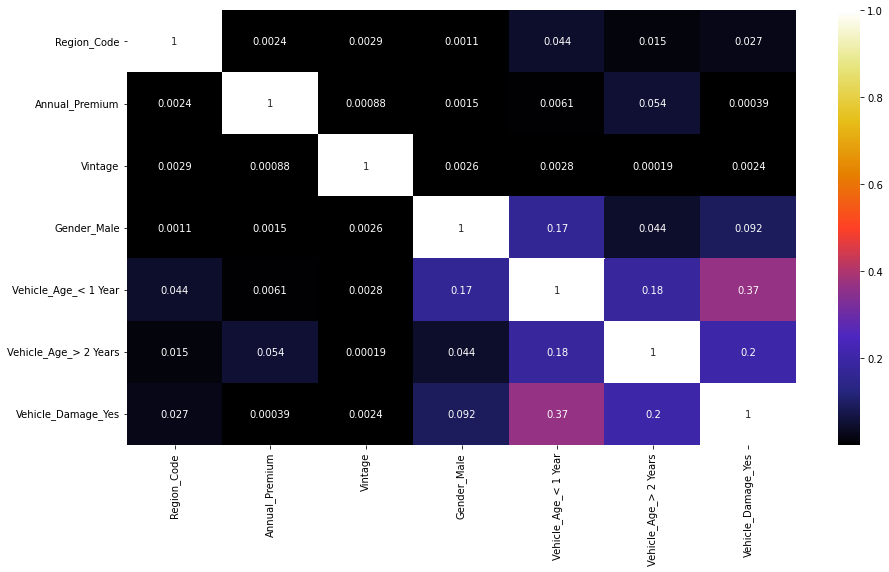

In [50]:
plt.figure(figsize=(15,8))
correlation = features5.corr()
sns.heatmap(abs(correlation), annot=True, cmap='CMRmap')

In [51]:
x= new_df[['Region_Code','Annual_Premium','Vintage','Gender_Male','Vehicle_Age_< 1 Year','Vehicle_Age_> 2 Years','Vehicle_Damage_Yes']]

In [52]:
y= new_df['Response']

In [53]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size= 0.20, random_state=10)

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
SM = SMOTE(random_state = 42)

In [ ]:
x_train_SM, y_train_SM = SM.fit_resample(x_train, y_train)

In [ ]:
print(x_train_SM.shape)
print(y_train_SM.shape)

(520994, 7)
(520994,)


In [ ]:
print(x_train.shape)
print(y_train.shape)

(296631, 7)
(296631,)


In [ ]:
!pip install Counter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for Counter: filename=Counter-1.0.0-py3-none-any.whl size=5411 sha256=41f341a459ee0049d4da00d8f25365420a5fbd8973c633d9a6eeb02ddd75159d
  Stored in directory: /root/.cache/pip/wheels/05/78/ee/7f4336de4d2631224a4b303be03e48eeb01db89bb5bd790f5d
Successfully built Counter


In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
print('Resampled dataset shape {}'.format(Counter(y_train_SM)))

Original dataset shape Counter({0: 260497, 1: 36134})
Resampled dataset shape Counter({0: 260497, 1: 260497})


In [ ]:
# Transforming data
scaler = MinMaxScaler()
x_train_SM = scaler.fit_transform(x_train_SM)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(x_train_SM, y_train_SM)

LogisticRegression()

In [ ]:
logreg_prediction = logreg.predict(x_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(x_train_SM, y_train_SM))
print("Validation accuracy Score : ",logreg_accuracy )

Training accuracy Score    :  0.8077194746964457
Validation accuracy Score :  0.7145014698346773


In [ ]:
print(classification_report(logreg_prediction,y_test))

              precision    recall  f1-score   support

           0       0.71      0.96      0.81     48165
           1       0.77      0.27      0.40     25993

    accuracy                           0.71     74158
   macro avg       0.74      0.61      0.60     74158
weighted avg       0.73      0.71      0.67     74158



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_SM, y_train_SM)

RandomForestClassifier()

In [ ]:
rf_prediction = rf_clf.predict(x_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)
print("Training accuracy Score    : ",rf_clf.score(x_train_SM, y_train_SM))
print("Validation accuracy Score : ",rf_accuracy )


Training accuracy Score    :  0.9871399670629604
Validation accuracy Score :  0.7983899242158634


In [ ]:
print(classification_report(rf_prediction,y_test))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     61252
           1       0.39      0.27      0.32     12906

    accuracy                           0.80     74158
   macro avg       0.62      0.59      0.60     74158
weighted avg       0.77      0.80      0.78     74158



In [ ]:
from sklearn.tree import DecisionTreeClassifier

modeldt = DecisionTreeClassifier()

modeldt.fit(x_train_SM, y_train_SM)


DecisionTreeClassifier()

In [ ]:
modelprediction = modeldt.predict(x_test)
model_accuracy = accuracy_score(y_test, modelprediction)

print("Training accuracy Score    : ",modeldt.score(x_train_SM, y_train_SM))
print("Validation accuracy Score : ",model_accuracy )

Training accuracy Score    :  0.9871534029182678
Validation accuracy Score :  0.8013161088486744


In [ ]:
print(classification_report(modelprediction,y_test))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     62435
           1       0.33      0.26      0.29     11723

    accuracy                           0.80     74158
   macro avg       0.60      0.58      0.59     74158
weighted avg       0.78      0.80      0.79     74158

